In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [22]:
def runge_Kutt(f, x0, y0, h, b):
    x = x0
    y = y0
    array = np.array([])
    arrayx = np.array([])
    while x<b:
        k1 = f(x, y)
        k2 = f(x + h/2,y + (h*k1)/2)
        k3 = f(x + h/2,y + (h*k2)/2)
        k4 = f(x + h,y + h*k3)
        y = y + h*(k1 + 2*k2 + 2*k3 + k4)/6
        array = np.append(array, y)
        arrayx = np.append(arrayx, x)
        x += h
    return arrayx, array

In [71]:
l = 0.4
m = 0.7
s = 0.8
A = 3
al = 0.3
x0 = 0
y0 = 5

def f(t, k):
    return -(l + m)*k + s*A*k**al

p1 = runge_Kutt(f, x0, y0, 0.01, 10)
p2 = runge_Kutt(f, x0, 1, 0.01, 10)
p3 = runge_Kutt(f, x0, 0.1, 0.01, 10)
print(f"Solution: {p1[-1][-1]}")

Solution: 3.0488912016982614


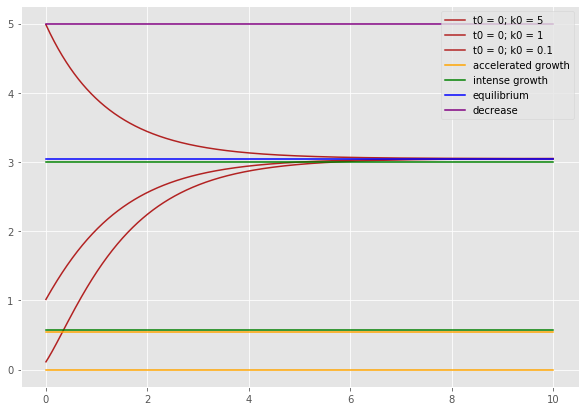

In [143]:
cx = np.linspace(0, 10, 10)
cy1 = np.array([(al*s*A/(l+m))**(1/(1-al))]*10)
cy12 = np.array([(al*s*A/(l+m))**(1/(1-al))+0.03]*10)
cyeq = np.array([(s*A/(l+m))**(1/(1-al))]*10)
cyeq2 = np.array([(s*A/(l+m))**(1/(1-al))-0.05]*10)
cy3 = np.array([0]*10)
cy4 = np.array([y0]*10)
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(p1[0], p1[1], c='firebrick', label="t0 = 0; k0 = 5")
plt.plot(p2[0], p2[1], c='firebrick', label="t0 = 0; k0 = 1")
plt.plot(p3[0], p3[1], c='firebrick', label="t0 = 0; k0 = 0.1")
plt.plot(cx, cy1, c="orange", label="accelerated growth")
plt.plot(cx, cy12, c="g")
plt.plot(cx, cy3, c="orange")
plt.plot(cx, cyeq2, c="green", label="intense growth")
plt.plot(cx, cyeq, c="blue", label="equilibrium")
plt.plot(cx, cy4, c="purple", label="decrease")
plt.plot
plt.legend()
plt.show()